Import Libraries and dataset

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("diabetes_dirty.csv")
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Checking for columns datatype, shape and missing values

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


Checking for NaN values

In [72]:
data.isnull().sum()

AGE            0
SEX            0
BMI            0
BP             0
S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
PROGRESSION    0
dtype: int64

Text(0.5, 1.0, 'Correlation between features')

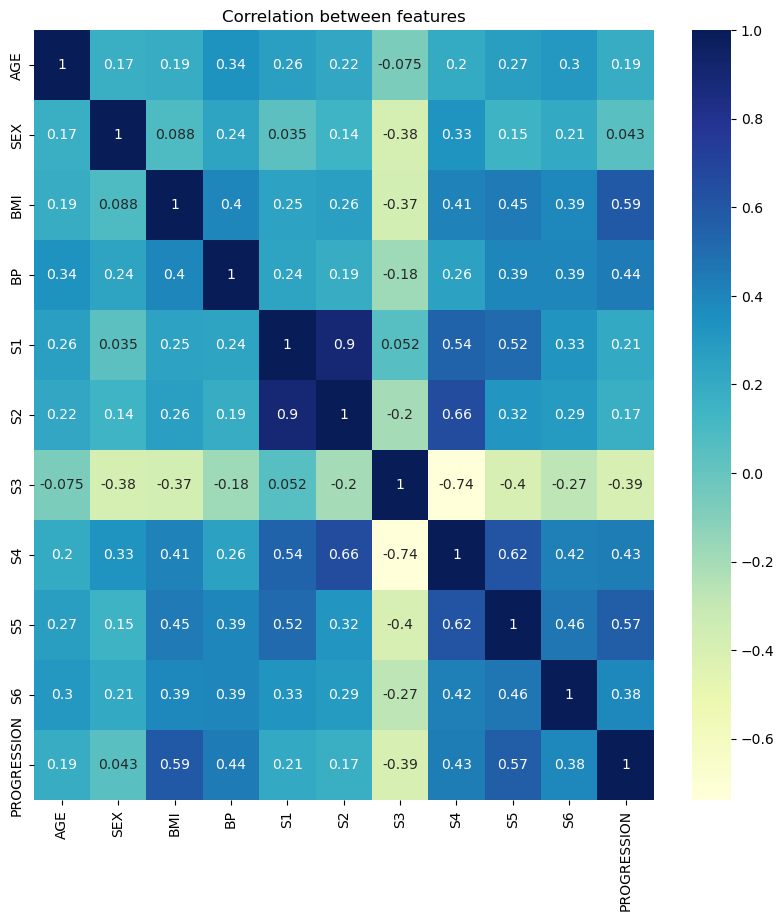

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation between features')

Text(0.5, 1.0, 'Correlation with target variable')

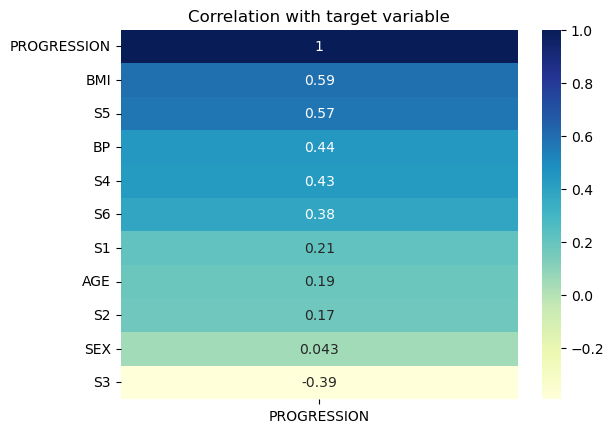

In [74]:
corr = data.corr()[['PROGRESSION']].sort_values(by='PROGRESSION', ascending=False)
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation with target variable')

Differentiate between the independent variables and the dependent variable, and assign them to variables X and Y.

In [75]:
X = data.drop('PROGRESSION', axis=1)
y = data[['PROGRESSION']]

Generate training and test sets comprising 80% and 20% of the data respectively.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Investigation of the necessity for scaling or normalization of the data.

Text(0.5, 1.0, 'Scale distribution of features')

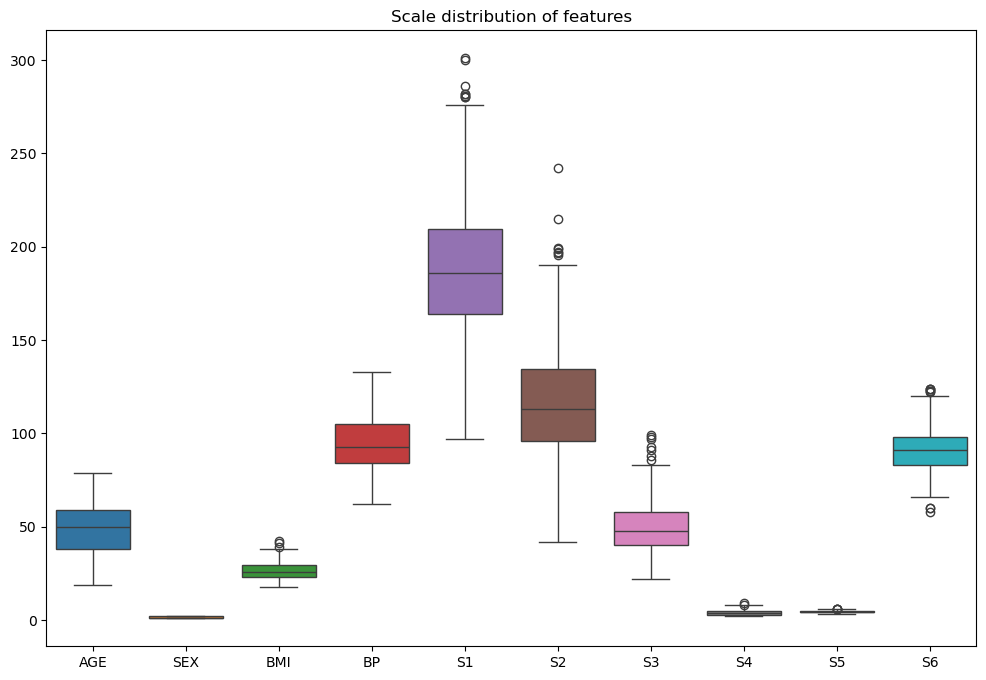

In [77]:
plt.figure(figsize=(12,8))
sns.boxplot(X)
plt.title('Scale distribution of features')

Let's see if it is Gauss distribution or skewed.

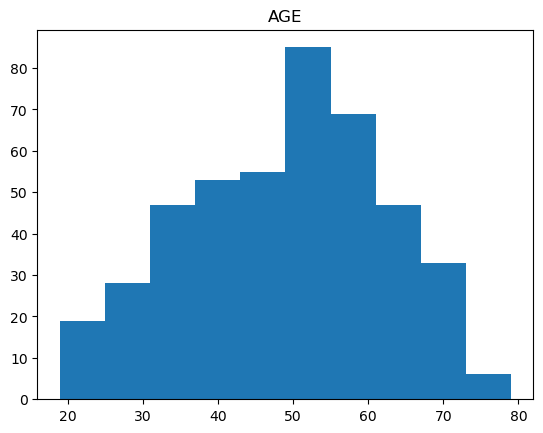

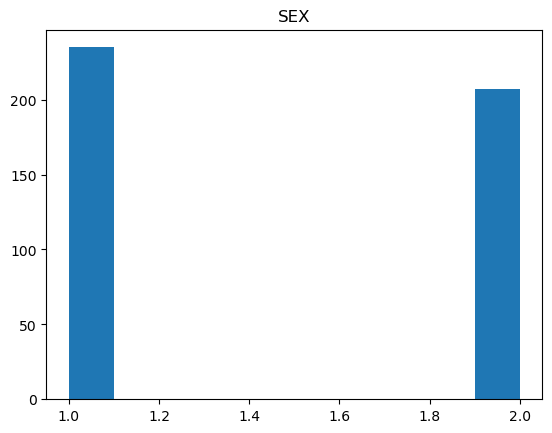

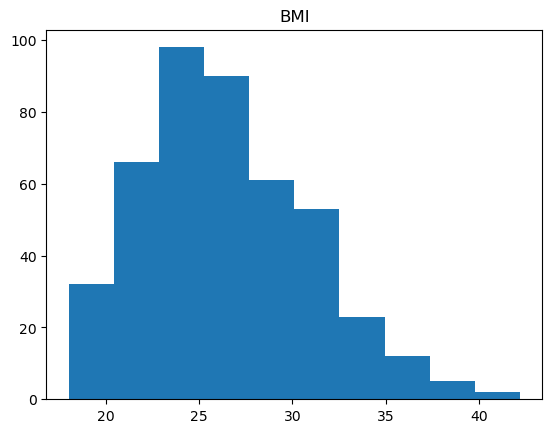

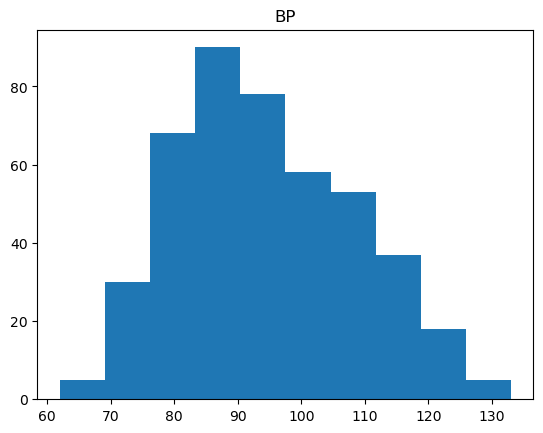

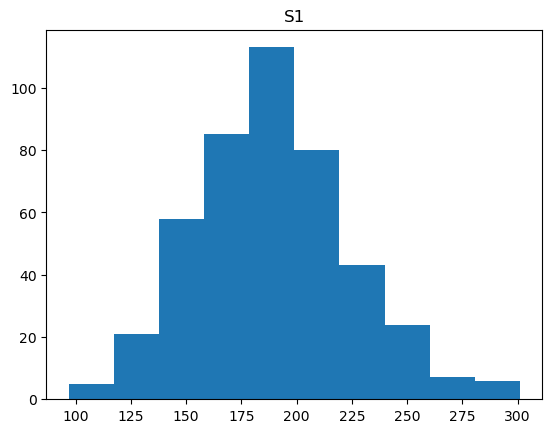

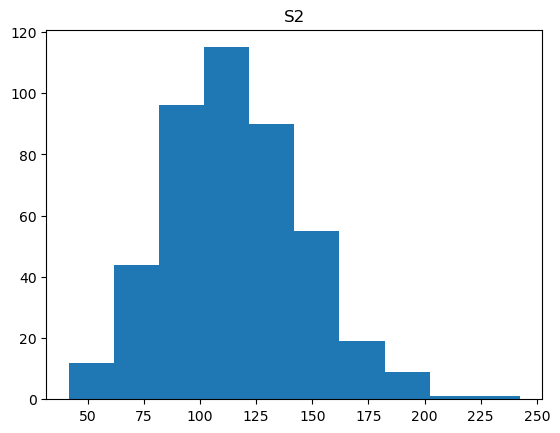

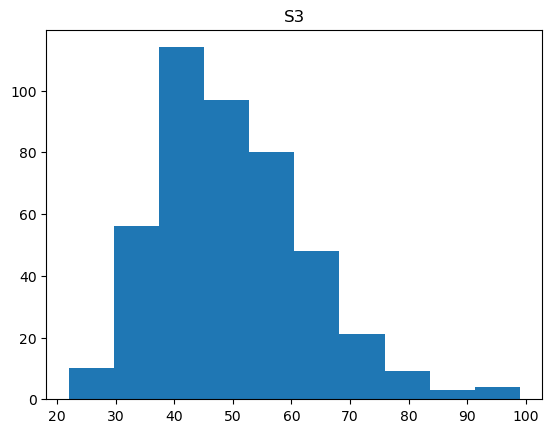

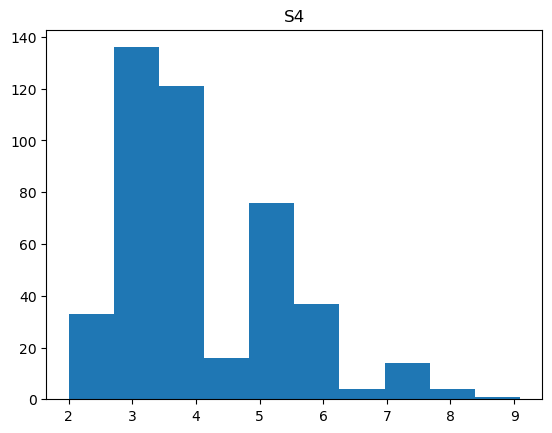

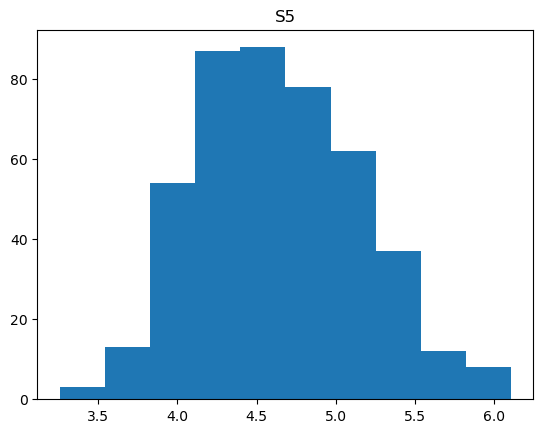

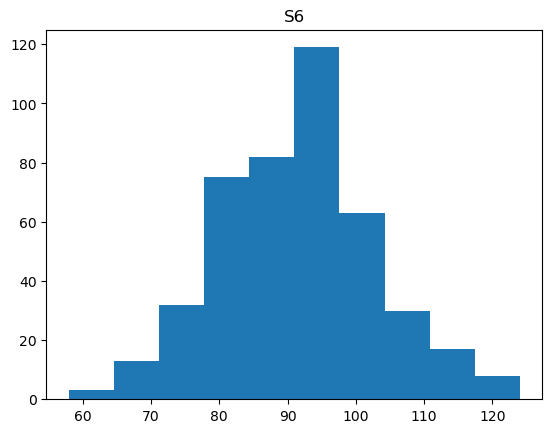

In [78]:
for f in X.columns:
    plt.hist(data=X, x=f)
    plt.title(f)
    plt.show()

For all the features Gauss distributed, I can use Standardisation scaling, but I need to drop the SEX column because it is a categorical variable. The 'SEX' feature does not correlate with the target variable.

Dropping 'SEX' column and assign features to variables X and y

In [79]:
X = data.drop(columns=['PROGRESSION', 'SEX'], axis=1)
y = data[['PROGRESSION']]

Feature scaling

In [80]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Generating training and test sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Generating a multiple linear regression model

In [82]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)
print(f"Predictions: {y_pred[:5]}")

Intercept: 
 [151.39209475]
Coefficients: 
 [[  0.16618784  28.07482017  14.47022415 -42.07500824  24.27327048
    9.26077057   8.72333748  36.2828124    1.81047867]]
Predictions: [[130.89093858]
 [168.63506971]
 [153.39426493]
 [265.27306441]
 [132.78329299]]


Checking model with metrics

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2986.7329221144396
Root Mean Squared Error: 54.65101025703404


In [84]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print ("R2 Score:", round (model.score(X_test, y_test), 4))

R2 Score: 0.4363


This score is quite is not close to 1, which suggests that our model not fits our observations quite well.

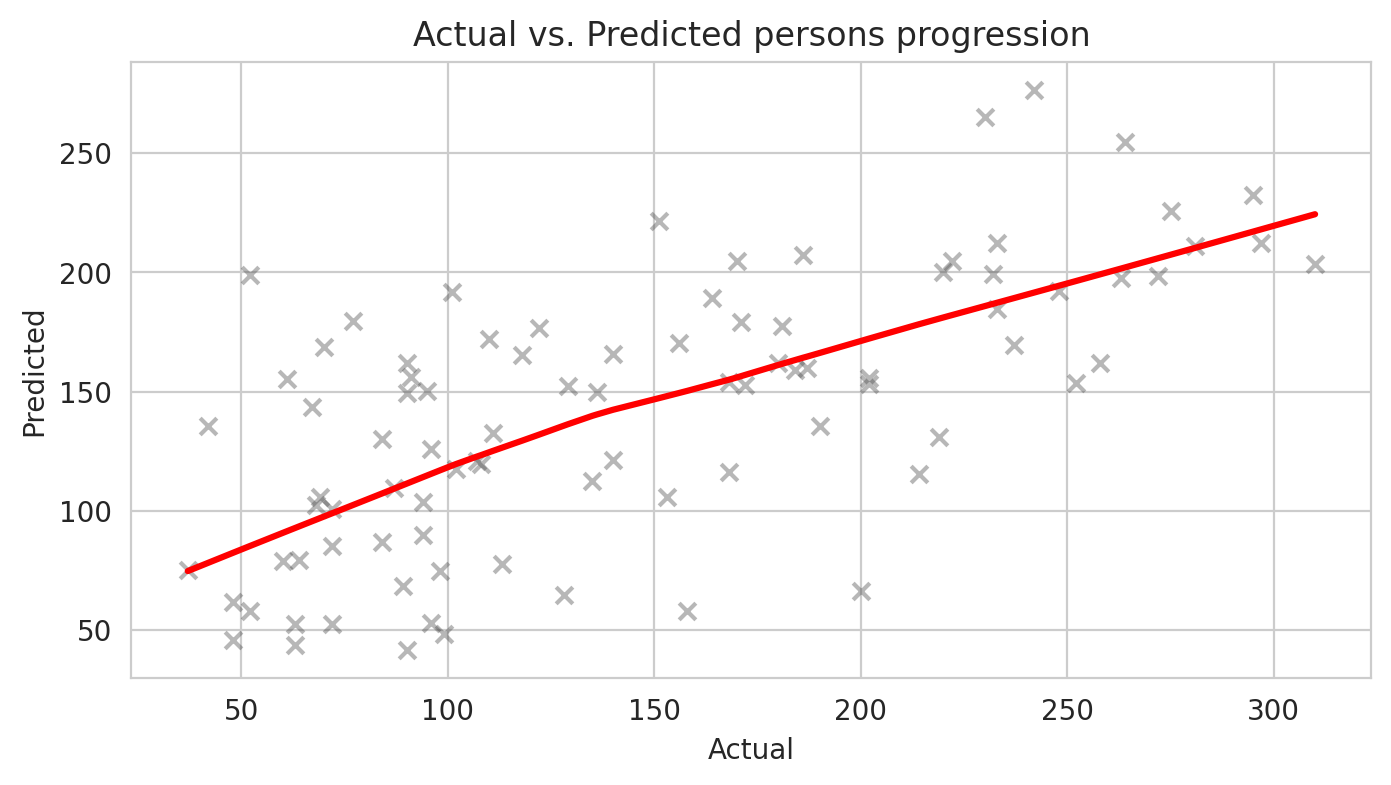

In [85]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(x=y_test,y=y_pred,ci=99, marker="x", color=".3", line_kws=dict(color="r"),lowess=True,
                scatter_kws = {'alpha': 0.4})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted persons progression')
plt.show()

Points far to the diagonal line indicate bad predictions.